In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**GRAVITATIONAL WAVES PROJECT**
Dataset from [GWOSC](https://gwosc.org/eventapi/html/GWTC-1-confident/GW150914/v3/)

* Event: GW140914
* Info: 2015-09-14 09:50:44
* Documentation: [DOI](https://gwosc.org/GWTC-1/)
* Arxiv: [article](https://arxiv.org/abs/1811.12907)



.

##Steps for a Complete Analysis

* Download the relevant HDF5 files for H1 and L1. ✅

* Load the data from both files using h5py and inspect the attributes and structure of the datasets to ensure you understand the content. ✅

* Preprocess the Data: apply any necessary preprocessing steps such as filtering, windowing, or noise reduction to the strain data.


* Time Alignment: align the data from both detectors in time, using the GPS start times and time spacing attributes to ensure both datasets cover the same time period.


* Cross-Correlation: perform cross-correlation between the H1 and L1 datasets to identify common signals, which can help in detecting and confirming gravitational wave events.


* Signal Detection and Analysis: use machine learning models or traditional signal processing techniques to detect and analyze potential gravitational wave signals.


Visualization: plot the strain data and any detected signals to visually inspect and confirm the findings.

In [19]:
import h5py

def explore_hdf5(file_path):
    with h5py.File(file_path, 'r') as f:
        def print_attrs(name, obj):
            print(f"{name}: {type(obj)}")
            for key, val in obj.attrs.items():
                print(f"  - Attribute {key}: {val}")

        f.visititems(print_attrs)

# file path of HDF5 files
file_path_H1 = '/content/drive/MyDrive/GW/data/H-H1_GWOSC_4KHZ_R1-1126259447-32.hdf5'
file_path_L1 = '/content/drive/MyDrive/GW/data/L-L1_GWOSC_4KHZ_R1-1126259447-32.hdf5'

# Exploring the structure and attributes of the HDF5 files
print("Contenuto del file H1:")
explore_hdf5(file_path_H1)
print("\nContenuto del file L1:")
explore_hdf5(file_path_L1);

Contenuto del file H1:
meta: <class 'h5py._hl.group.Group'>
meta/Description: <class 'h5py._hl.dataset.Dataset'>
meta/DescriptionURL: <class 'h5py._hl.dataset.Dataset'>
meta/Detector: <class 'h5py._hl.dataset.Dataset'>
meta/Duration: <class 'h5py._hl.dataset.Dataset'>
meta/GPSstart: <class 'h5py._hl.dataset.Dataset'>
meta/Observatory: <class 'h5py._hl.dataset.Dataset'>
meta/Type: <class 'h5py._hl.dataset.Dataset'>
meta/UTCstart: <class 'h5py._hl.dataset.Dataset'>
quality: <class 'h5py._hl.group.Group'>
quality/detail: <class 'h5py._hl.group.Group'>
quality/injections: <class 'h5py._hl.group.Group'>
quality/injections/InjDescriptions: <class 'h5py._hl.dataset.Dataset'>
quality/injections/InjShortnames: <class 'h5py._hl.dataset.Dataset'>
quality/injections/Injmask: <class 'h5py._hl.dataset.Dataset'>
  - Attribute Bits: 5
  - Attribute Description: A bitmask encoded as an integer-valued timeseries. The first "Bits" bits might be used, for each there is an entry in "Bits", "Shortnames", "D

## Gravitational Wave Signal Data (Strain Data).
* Strain: This dataset contains gravitational waves signal data. The signal is recorded as a relative change in the length of the interferometer arms and is expressed in terms of "strain." The signal is typically very weak and needs to be extracted from a background of instrumental and environmental noise.

Type:
 * One-dimensional array of floating-point (float) numbers.
 * Unit of Measurement: Strain (a unitless measure of relative strain).
 * Sampling: Data are sampled at a high frequency, typically 4 kHz (4096 Hz).

## Attributes of the Strain Dataset
The attributes associated with the strain/Strain dataset include crucial information for interpreting the data:

* Xstart: The start time of the data recording in GPS seconds.
* Xend: The end time of the data recording in GPS seconds.
* Sampling_rate: The sampling rate of the data, often 4096 Hz.
* Detector: The name of the detector (e.g., H1 for Hanford and L1 for Livingston).


In [3]:
import numpy as np

def load_data(file_path):
    with h5py.File(file_path, 'r') as f:
        strain = f['strain']['Strain'][:]
        # Controlla gli attributi disponibili e carica quelli esistenti
        gps_start = f['strain']['Strain'].attrs.get('Xstart', None)
        gps_end = f['strain']['Strain'].attrs.get('Xend', None)
        # Se l'attributo non è presente, puoi calcolare la fine in base alla lunghezza del segnale e alla frequenz a di campionamento
        if gps_end is None and gps_start is not None:
            sampling_rate = 4096  # Assumendo una frequenza di campionamento di 4096 Hz
            gps_end = gps_start + len(strain) / sampling_rate
    return strain, gps_start, gps_end


# Sostituisci con il percorso corretto del tuo file HDF5
file_path_H1 = '/content/drive/MyDrive/GW/data/H-H1_GWOSC_4KHZ_R1-1126259447-32.hdf5'
file_path_L1 = '/content/drive/MyDrive/GW/data/L-L1_GWOSC_4KHZ_R1-1126259447-32.hdf5'

strain_H1, start_H1, end_H1 = load_data(file_path_H1)
strain_L1, start_L1, end_L1 = load_data(file_path_L1)


In [14]:
def load_and_explore_data(file_path):
    with h5py.File(file_path, 'r') as f:
        # Stampa i gruppi principali
        print("Gruppi principali nel file:")
        for key in f.keys():
            print(key)

        # Esplora il contenuto del gruppo 'strain'
        strain_group = f['strain']
        print("\nContenuto del gruppo 'strain':")
        for key in strain_group.keys():
            print(key)

        # Esplora gli attributi del dataset 'Strain'
        strain_data = strain_group['Strain']
        print("\nAttributi del dataset 'Strain':")
        for key, val in strain_data.attrs.items():
            print(f"  - {key}: {val}")

        # Carica e visualizza i primi campioni del dataset 'Strain'
        strain = strain_data[:]
        print("\nPrimi 10 campioni del dataset 'Strain':")
        print(strain[:10])

        return strain

# Percorso del file HDF5
file_path_H1 = '/content/drive/MyDrive/GW/data/H-H1_GWOSC_4KHZ_R1-1126259447-32.hdf5'

# Carica ed esplora i dati
strain_H1 = load_and_explore_data(file_path_H1)


Gruppi principali nel file:
meta
quality
strain

Contenuto del gruppo 'strain':
Strain

Attributi del dataset 'Strain':
  - Npoints: 131072
  - Xlabel: GPS time
  - Xspacing: 0.000244140625
  - Xstart: 1126259447
  - Xunits: second
  - Ylabel: Strain
  - Yunits: 

Primi 10 campioni del dataset 'Strain':
[9.06730891e-21 2.01178871e-20 3.71290472e-20 2.09071166e-20
 1.15986367e-20 2.07387669e-20 3.18222310e-20 3.12837122e-20
 1.26644269e-20 1.79316800e-20]


##Explanation of Each Attribute
* Npoints: Indicates the total number of samples in the dataset. This is essential for knowing the length of your time series.
* Xlabel: Describes what the X-axis represents, which in this case is the GPS time.
* Xspacing: The time interval (in seconds) between each sample. This helps you understand the resolution of the data. Given the Xspacing of 0.000244140625 seconds, the data is sampled at approximately 4096 Hz.
* Xstart: The starting point in GPS time for the data collection. This allows you to align the data with other time series data.
* Xunits: The unit of measurement for the X-axis, confirming that time is measured in seconds.
* Ylabel: Indicates what the Y-axis represents, which is the strain in this case.
* Yunits: The unit for the Y-axis, which typically would be dimensionless for strain.

GPS Start: 1126259447
GPS End: None
Strain Data (first 10 samples): [9.06730891e-21 2.01178871e-20 3.71290472e-20 2.09071166e-20
 1.15986367e-20 2.07387669e-20 3.18222310e-20 3.12837122e-20
 1.26644269e-20 1.79316800e-20]


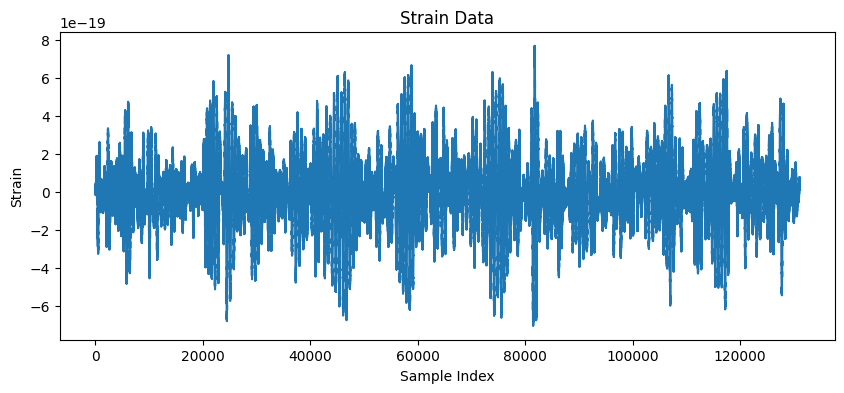

In [4]:
import matplotlib.pyplot as plt

def load_and_plot_data(file_path):
    with h5py.File(file_path, 'r') as f:
        strain = f['strain']['Strain'][:]
        gps_start = f['strain']['Strain'].attrs.get('Xstart', None)
        gps_end = f['strain']['Strain'].attrs.get('Xend', None)

        print(f"GPS Start: {gps_start}")
        print(f"GPS End: {gps_end}")
        print(f"Strain Data (first 10 samples): {strain[:10]}")

        # Plot the strain data
        plt.figure(figsize=(10, 4))
        plt.plot(strain)
        plt.xlabel('Sample Index')
        plt.ylabel('Strain')
        plt.title('Strain Data')
        plt.show()

# Sostituisci con il percorso corretto del tuo file HDF5
file_path_H1 = '/content/drive/MyDrive/GW/data/H-H1_GWOSC_4KHZ_R1-1126259447-32.hdf5'

# Carica e visualizza i dati
load_and_plot_data(file_path_H1)


In [7]:
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

fs = 4096  # Frequenza di campionamento
lowcut = 20.0
highcut = 500.0

strain_H1_filtered = bandpass_filter(strain_H1, lowcut, highcut, fs)
strain_L1_filtered = bandpass_filter(strain_L1, lowcut, highcut, fs)

In [8]:
def create_windows(data, window_size, step_size):
    windows = []
    for start in range(0, len(data) - window_size + 1, step_size):
        window = data[start:start + window_size]
        windows.append(window)
    return np.array(windows)

window_size = 4096  # 1 secondo di dati
step_size = 2048    # Sovrapposizione del 50%

windows_H1 = create_windows(strain_H1_filtered, window_size, step_size)

In [9]:
windows_H1

array([[-1.47453037e-22,  5.36456159e-21,  9.89733509e-21, ...,
         2.77205141e-21,  2.70746623e-21,  2.71053323e-21],
       [ 3.39646411e-22,  6.63397209e-24, -3.77381632e-22, ...,
         1.50475423e-21,  1.41300254e-21,  1.39736201e-21],
       [ 2.73552326e-21,  2.71276916e-21,  2.59162710e-21, ...,
         1.04694986e-21,  1.05055444e-21,  1.00927566e-21],
       ...,
       [ 2.05181983e-22, -1.85288465e-22, -4.71047266e-22, ...,
         3.07357642e-21,  3.29278037e-21,  3.26379559e-21],
       [-1.65485536e-22, -5.68225663e-22, -8.17821712e-22, ...,
         1.54260174e-21,  1.92418469e-21,  2.11427767e-21],
       [ 2.98668553e-21,  2.56077723e-21,  2.13709453e-21, ...,
        -1.18218502e-20, -7.03857654e-21, -1.01600654e-21]])

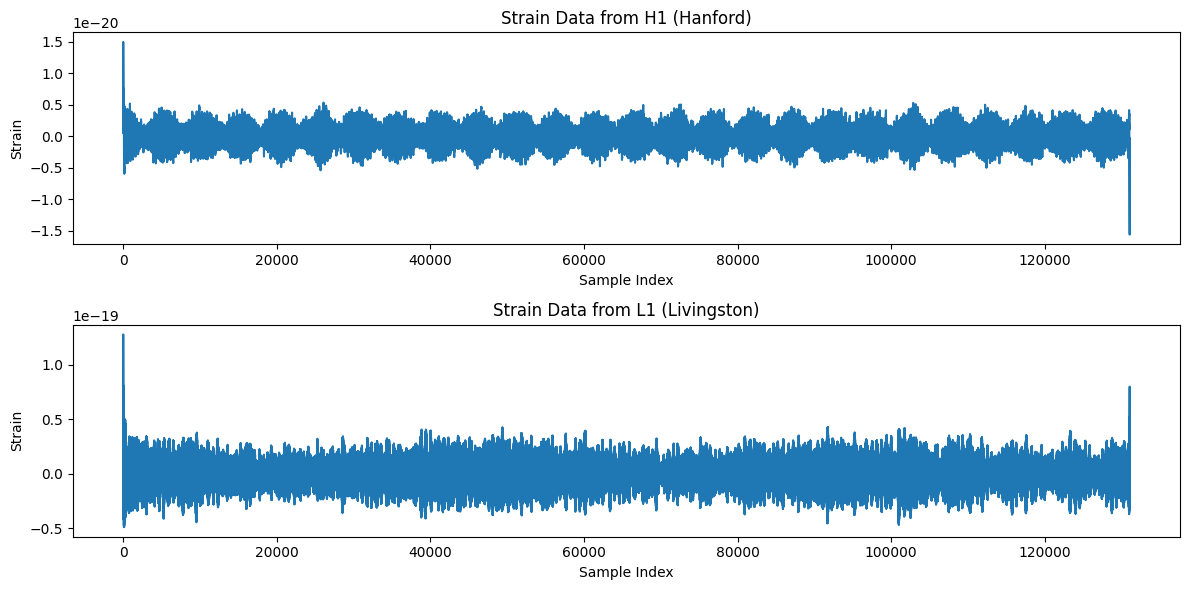

In [10]:
# Visualizza i dati
def plot_data(strain_H1, strain_L1):
    plt.figure(figsize=(12, 6))
    plt.subplot(211)
    plt.plot(strain_H1)
    plt.title('Strain Data from H1 (Hanford)')
    plt.xlabel('Sample Index')
    plt.ylabel('Strain')

    plt.subplot(212)
    plt.plot(strain_L1)
    plt.title('Strain Data from L1 (Livingston)')
    plt.xlabel('Sample Index')
    plt.ylabel('Strain')

    plt.tight_layout()
    plt.show()

plot_data(strain_H1, strain_L1)

In [13]:
print(strain_H1)

[ 5.19075153e-22  7.00450412e-21  1.19248661e-20 ... -1.33205263e-20
 -8.10636207e-21 -9.69519050e-22]
